In [1]:
# libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

C:\Users\Neha\AppData\Local\Temp\ipykernel_28204\3254704095.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# datasets
categorical_data = pd.read_excel("train_new/TRAIN_CATEGORICAL_METADATA_new.xlsx")
quantitative_data = pd.read_excel("train_new/TRAIN_QUANTITATIVE_METADATA_new.xlsx")
connectome_data = pd.read_csv("train_new/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
train_data = pd.read_excel("train_new/TRAINING_SOLUTIONS.xlsx")

print(connectome_data)

     participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0      70z8Q2xdTXM3          0.222930          0.527903          0.429966   
1      WHWymJu6zNZi          0.614765          0.577255          0.496127   
2      4PAQp1M6EyAo         -0.116833          0.458408          0.260703   
3      obEacy4Of68I          0.199688          0.752714          0.658283   
4      s7WzzDcmDOhF          0.227321          0.613268          0.621447   
...             ...               ...               ...               ...   
1208   9gpepMI9sj5q          0.265284          0.551726          0.628318   
1209   FIDen5rdMc0v         -0.018377          0.576689          0.527451   
1210   dlsMC4TXL4e8          0.227028          0.405659          0.023545   
1211   syeyZjEx8FUx          0.189849          0.752876          0.842463   
1212   wWZUoBUOOXhT          0.165500          0.779444          0.686992   

      0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolum

In [3]:
# print(connectome_data)


cat_quant = pd.merge(categorical_data, quantitative_data, on="participant_id", how="inner")
print(cat_quant)

merge_data = pd.merge(cat_quant, connectome_data, on="participant_id", how="inner")

print(merge_data)

merge_data.head()


     participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0      00aIpNTbG5uh                     2019                       4   
1      00fV0OyyoLfw                     2017                       1   
2      04X1eiS79T4B                     2017                       1   
3      05ocQutkURd6                     2018                       1   
4      06YUNBA9ZRLq                     2018                       1   
...             ...                      ...                     ...   
1208   zwjJWCRzKhDz                     2019                       4   
1209   zwXD5v17Rx01                     2018                       1   
1210   zWzLCi3NTBTd                     2018                       3   
1211   Zy9GTHDxUbXU                     2019                       4   
1212   Zye7yYRQohXi                     2017                       1   

      PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                                  1.0                          

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN,...,-0.047477,-0.096450,-0.280312,0.037560,0.423037,0.242453,0.336213,0.402338,0.327915,0.539032
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0,...,-0.143218,-0.276464,-0.332783,-0.332711,0.556939,0.475578,0.429196,0.457970,0.312571,0.595978
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN,...,-0.133778,-0.108588,-0.002132,-0.175586,0.679183,0.290292,0.486680,0.255208,0.575017,0.605182
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0,...,-0.096647,-0.041420,-0.199576,-0.216457,0.519074,0.298586,0.415466,0.511607,0.361204,0.446613
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN,...,-0.158995,-0.274017,-0.141012,-0.002865,0.515169,0.336139,0.316430,0.442230,0.177079,0.378278


In [4]:
merge_data.info()
merge_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19928 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19925), int64(2), object(1)
memory usage: 184.4+ MB


,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,EHQ_EHQ_Total,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,1213.000000,1213.000000,1170.000000,1159.000000,1210.000000,1198.000000,1182.000000,1015.000000,991.000000,1200.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.435897,2.177739,2.294215,17.862270,25.545685,16.876847,30.257316,59.514750,...,0.044413,-0.079307,-0.037423,0.009393,0.557159,0.376624,0.370711,0.500415,0.476418,0.543181
std,1.122522,1.135147,0.693174,3.204782,0.750660,3.505608,16.757043,3.929558,13.901144,49.744631,...,0.191253,0.204061,0.205052,0.198820,0.150605,0.197995,0.191249,0.177047,0.177732,0.170237
min,2015.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000,-100.000000,...,-0.547155,-0.620350,-0.584162,-0.605647,-0.052284,-0.359869,-0.553067,-0.302408,-0.307228,-0.224057
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,5.000000,15.000000,20.000000,46.670000,...,-0.087566,-0.220508,-0.187871,-0.124404,0.469147,0.262601,0.242569,0.389078,0.367971,0.442283
50%,2018.000000,1.000000,0.000000,1.000000,2.000000,18.000000,30.000000,18.000000,35.000000,77.800000,...,0.043204,-0.093695,-0.044155,0.004375,0.573840,0.391739,0.388528,0.524508,0.496103,0.566455
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000,94.470000,...,0.177608,0.049707,0.104526,0.146865,0.666128,0.521904,0.505970,0.630443,0.600065,0.667402
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000,100.000000,...,0.670512,0.596618,0.630932,0.666169,0.889148,0.866371,0.828784,0.914021,0.898459,0.903364


In [5]:
# handling connectcome data
print(connectome_data.isnull().sum())
print(connectome_data.info())

# summary statistics for connectcome data
print("Summary statistics for connectcome data")
print(connectome_data.describe().T)

participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB
None
Summary statistics for connectcome data
                       count      mean       std       min       25%  \
0throw_1thcolumn      1213.0  0.185265  0.238481 -0.657053  0.028235   
0throw_2thcolumn      1213.0  0.583053  0.172632 -0.224815  0.495514   
0throw_3thcolumn      1213.0  0.439351  0.235019 -0.517318  0.286137   
0throw_4thcolumn      1213.0  0.450398  0.212111 -0.440235  0.314428   
0throw_5thcolumn      1213.0  0.584654  0.195918 -0.486239  0.486735   
...           

In [6]:
# print(merge_data.isnull())
print(merge_data.isnull().sum())

# drop missing values
merge_data_cleaned = merge_data.dropna(axis=1, thresh=100)

# replace missing values with unknown
# df_filled = merge_data.fillna("Unknown")

# Fill specific columns
merge_data_cleaned['PreInt_Demos_Fam_Child_Ethnicity'] = merge_data['PreInt_Demos_Fam_Child_Ethnicity'].fillna("Unknown")


participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    43
PreInt_Demos_Fam_Child_Race         54
                                    ..
196throw_198thcolumn                 0
196throw_199thcolumn                 0
197throw_198thcolumn                 0
197throw_199thcolumn                 0
198throw_199thcolumn                 0
Length: 19928, dtype: int64


EDA

In [7]:
# quantitative_data.info()

# check for missing dataa
missing = quantitative_data.isnull().sum()
print(missing)


# get summary statistics
print("Summary statistics for quantitatve metadata")
print(quantitative_data.describe().T)


participant_id                  0
EHQ_EHQ_Total                  13
ColorVision_CV_Score           23
APQ_P_APQ_P_CP                 12
APQ_P_APQ_P_ID                 12
APQ_P_APQ_P_INV                12
APQ_P_APQ_P_OPD                12
APQ_P_APQ_P_PM                 12
APQ_P_APQ_P_PP                 12
SDQ_SDQ_Conduct_Problems        9
SDQ_SDQ_Difficulties_Total      9
SDQ_SDQ_Emotional_Problems      9
SDQ_SDQ_Externalizing           9
SDQ_SDQ_Generating_Impact       9
SDQ_SDQ_Hyperactivity           9
SDQ_SDQ_Internalizing           9
SDQ_SDQ_Peer_Problems           9
SDQ_SDQ_Prosocial               9
MRI_Track_Age_at_Scan         360
dtype: int64
Summary statistics for quantitatve metadata
                             count       mean        std    min        25%  \
EHQ_EHQ_Total               1200.0  59.514750  49.744631 -100.0  46.670000   
ColorVision_CV_Score        1190.0  13.419328   2.112830    0.0  14.000000   
APQ_P_APQ_P_CP              1201.0   3.819317   1.330348    2.0

In [8]:

# Handlling missing data 

# Replacing missing values with unknow 
# cols_to_fill = [
#     'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID',
#     'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
#     'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
#     'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
#     'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial'
# ]

# quantitative_data[cols_to_fill] = quantitative_data[cols_to_fill].fillna('Unknown')

# # Imputing missing values with median value

# quantitative_data['MRI_Track_Age_at_Scan'] = quantitative_data['MRI_Track_Age_at_Scan'].fillna(quantitative_data['MRI_Track_Age_at_Scan'].median())

# missing data ??
# missing = quantitative_data.isnull().sum()
# print(missing)


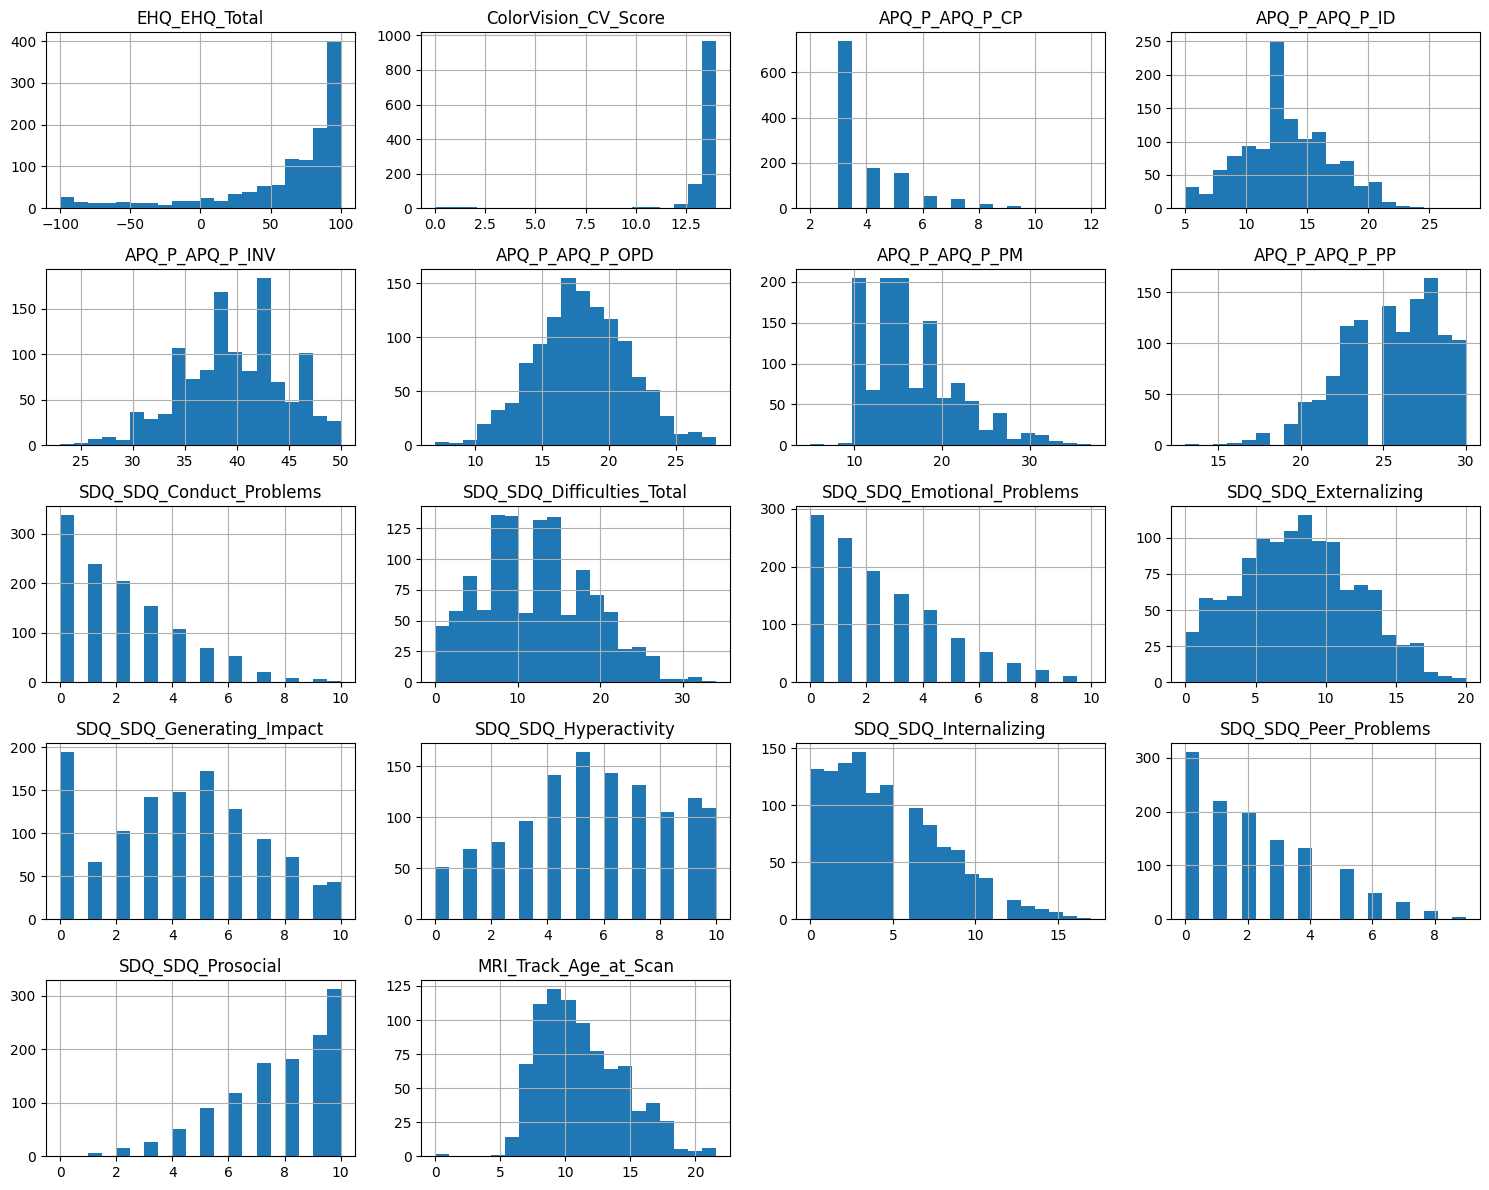

In [9]:

# plots for eda

quantitative_data.hist(bins=20, figsize=(15, 12))
plt.tight_layout()
plt.show()


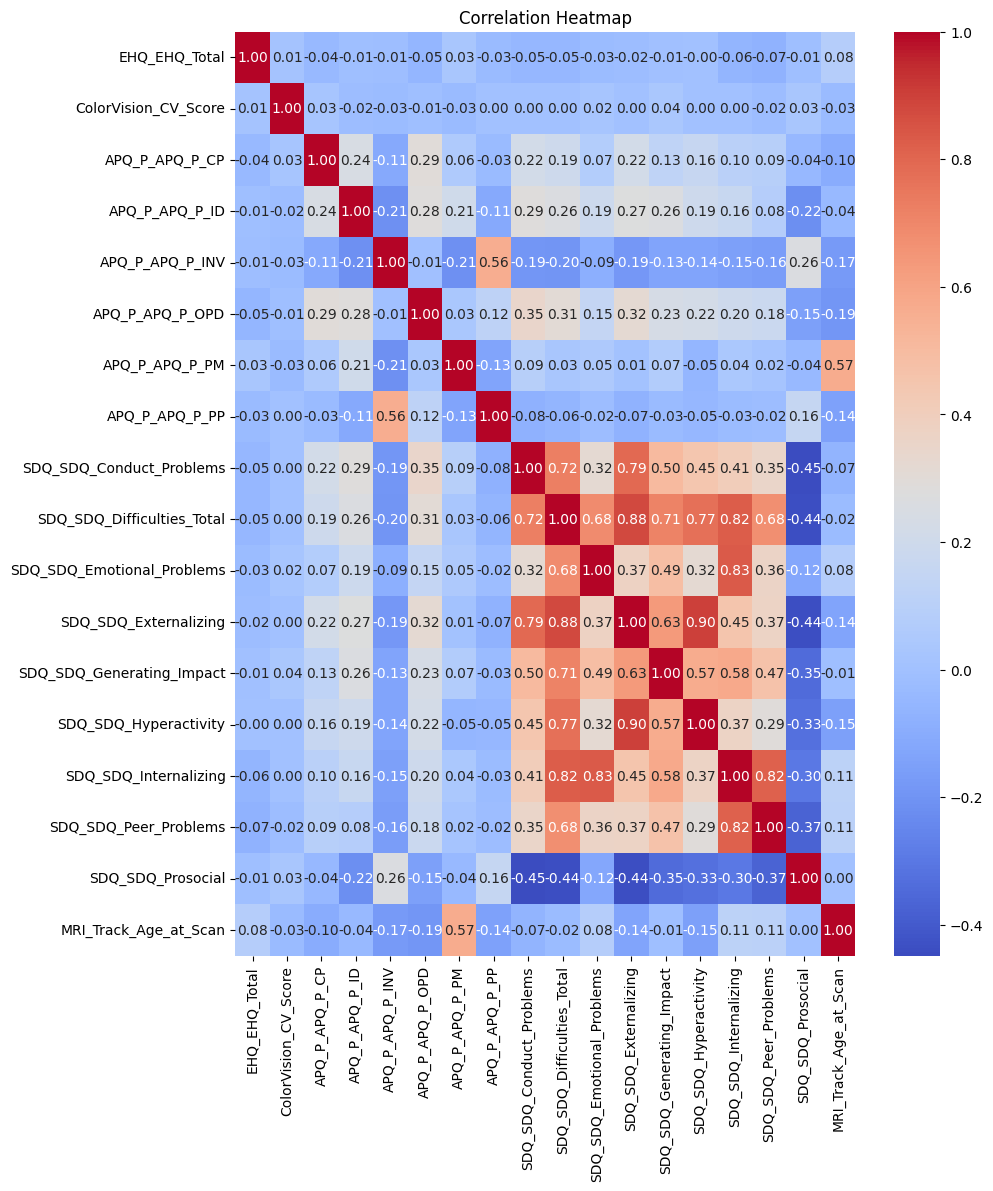

In [10]:

# corrrelation heatmap for quaantitative data
numeric_cols = quantitative_data.select_dtypes(include='number')

plt.figure(figsize=(10,12))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


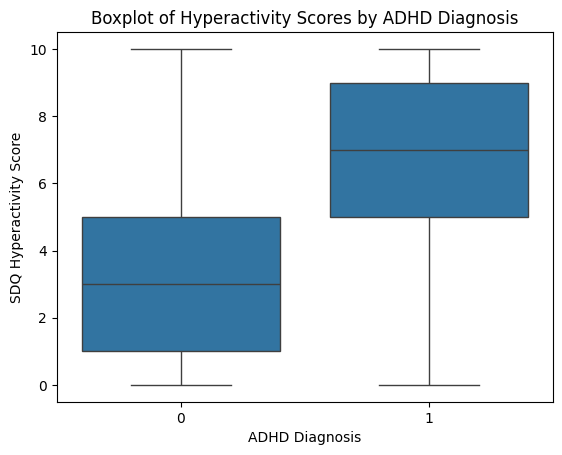

In [11]:

train_quant = pd.merge(train_data, quantitative_data, on="participant_id", how="inner")
# print(train_quant)
sns.boxplot(train_quant, x='ADHD_Outcome', y='SDQ_SDQ_Hyperactivity')
plt.title('Boxplot of Hyperactivity Scores by ADHD Diagnosis')
plt.xlabel('ADHD Diagnosis')
plt.ylabel('SDQ Hyperactivity Score')
plt.show()

# plt.xticks(rotation = 45)


In [ ]:
#print(categorical_data.info())
cat_num = pd.merge(train_data, categorical_data, on="participant_id", how="inner")
print(cat_num)
cat_num = categorical_data.drop(columns = ['participant_id'])

cat_num = cat_num.dropna()
cat_scaled = StandardScaler().fit_transform(cat_num)

kmeans = KMeans(n_clusters = 3, random_state = 42)  # Adjust number of clusters as needed
cat_num['Cluster'] = kmeans.fit_predict(cat_scaled)

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(cat_scaled)



     participant_id  ADHD_Outcome  Sex_F  Basic_Demos_Enroll_Year  \
0      UmrK0vMLopoR             1      1                     2016   
1      CPaeQkhcjg7d             1      0                     2019   
2      Nb4EetVPm3gs             1      0                     2016   
3      p4vPhVu91o4b             1      1                     2018   
4      M09PXs7arQ5E             1      1                     2019   
...             ...           ...    ...                      ...   
1208   Atx7oub96GXS             0      0                     2019   
1209   groSbUfkQngM             0      1                     2016   
1210   zmxGvIrOD0bt             0      1                     2015   
1211   rOmWFuJCud5G             0      0                     2018   
1212   k8HhHnnu2wmt             0      0                     2018   

      Basic_Demos_Study_Site  PreInt_Demos_Fam_Child_Ethnicity  \
0                          1                               0.0   
1                          3           

In [ ]:

# Create a DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(pca_components, columns = ['PCA1', 'PCA2'])
df_pca['Cluster'] = cat_num['Cluster']
# df_pca['ADHD_Outcome'] = cat_num['ADHD_Outcome']  # Replace with your actual ADHD column name
# df_pca['Sex_F'] = cat_num['Sex_F']  # Replace with your actual sex column name
pca_df_with_id = pd.concat([categorical_data[['participant_id']].reset_index(drop=True), df_pca], axis=1)
merged_df = pd.merge(pca_df_with_id, train_data[['participant_id', 'ADHD_Outcome', 'Sex_F']], on='participant_id', how='left')


In [22]:

# Merge cluster info and labels
pca_df_with_id = pd.concat([categorical_data[['participant_id']].reset_index(drop=True), df_pca], axis=1)
merged_df = pd.merge(pca_df_with_id, train_data[['participant_id', 'ADHD_Outcome', 'Sex_F']], on='participant_id', how='left')


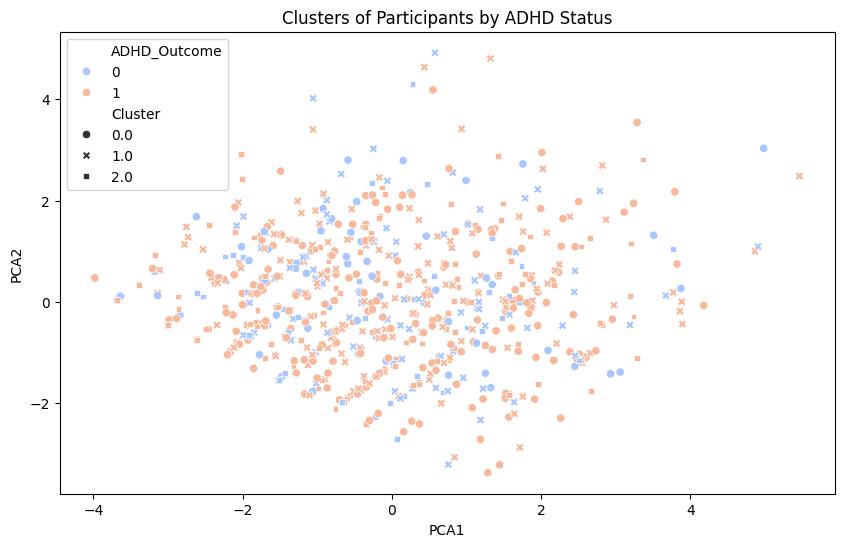

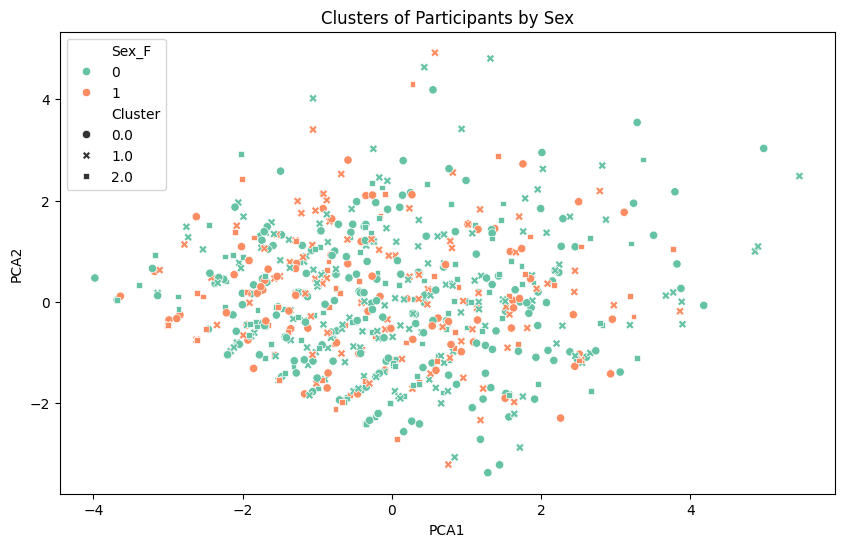

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='PCA1', y='PCA2', hue='ADHD_Outcome', style='Cluster', palette='coolwarm')
plt.title("Clusters of Participants by ADHD Status")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='PCA1', y='PCA2', hue='Sex_F', style='Cluster', palette='Set2')
plt.title("Clusters of Participants by Sex")
plt.show()


In [ ]:
sex_cluster_table = pd.crosstab(merged_df['Cluster'], merged_df['Sex_F'])
print("Cluster vs Sex:")
print(sex_cluster_table)

adhd_cluster_table = pd.crosstab(merged_df['Cluster'], merged_df['ADHD_Outcome'])
print("\nCluster vs ADHD Status:")
print(adhd_cluster_table)


Cluster vs Sex:
Sex_F      0   1
Cluster         
0.0      188  83
1.0      157  94
2.0      112  63

Cluster vs ADHD Status:
ADHD_Outcome   0    1
Cluster              
0.0           64  207
1.0           89  162
2.0           52  123


In [30]:
cat_num['Cluster'] = kmeans.labels_
clustered_data = pd.concat([cat_num, categorical_data[['participant_id']]], axis=1)
merged_df = pd.merge(clustered_data, train_data[['participant_id', 'Sex_F', 'ADHD_Outcome']], on='participant_id')
cluster_profiles = merged_df.groupby('Cluster').mean(numeric_only=True)
print(cluster_profiles)
for col in ['Sex_F', 'ADHD_Outcome']:  # Add more categorical columns as needed
    print(f"\nDistribution of {col} by Cluster:")
    print(pd.crosstab(merged_df['Cluster'], merged_df[col]))


         Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
Cluster                                                    
0.0                  2018.426184                3.175487   
1.0                  2017.367470                1.156627   
2.0                  2017.141593                1.482301   

         PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
Cluster                                                                  
0.0                              0.267409                     2.016713   
1.0                              0.322289                     1.704819   
2.0                              0.672566                     2.265487   

         MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  \
Cluster                                                    
0.0                     2.930362               19.086351   
1.0                     1.966867               19.039157   
2.0                     1.902655               15.570796   

         Barratt_Barratt_P1

In [ ]:
# Handling categorrical meta  data 
print(categorical_data.info())

# get summary statistics
print("Summary statistics for quantitatve metadata")
print(categorical_data.describe().T)

# check for missing dataa
missing = categorical_data.isnull().sum()
print(missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB
None
Summary statistics for quantitatve metadata
                         

In [ ]:

# Percentage of missing values per column
missing_percentage = categorical_data.isnull().mean() * 100
print("Percentage of missing values per column:\n")
print(missing_percentage)

# dropping rows with null values
categorical_clean = categorical_data.dropna()

Percentage of missing values per column:

participant_id                       0.000000
Basic_Demos_Enroll_Year              0.000000
Basic_Demos_Study_Site               0.000000
PreInt_Demos_Fam_Child_Ethnicity     3.544930
PreInt_Demos_Fam_Child_Race          4.451772
MRI_Track_Scan_Location              0.247321
Barratt_Barratt_P1_Edu               1.236603
Barratt_Barratt_P1_Occ               2.555647
Barratt_Barratt_P2_Edu              16.323166
Barratt_Barratt_P2_Occ              18.301731
dtype: float64


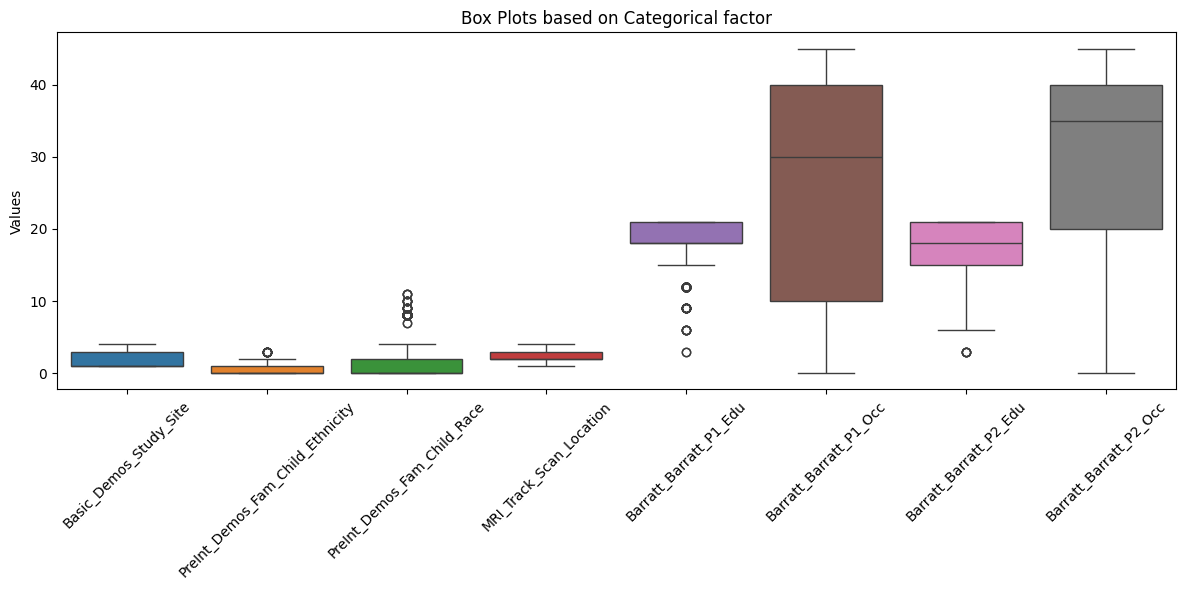

In [ ]:
# EDA for categorical data

# violin plot 
numeric_cols = categorical_clean.select_dtypes(include=['float64', 'int64']).columns

# Set plot size
# plt.figure(figsize=(15, 8))

# # Create one subplot per variable
# for i, col in enumerate(numeric_cols, 1):
#     plt.subplot(2, (len(numeric_cols) + 1) // 2, i)  # 2 rows of subplots
#     sns.violinplot(y=categorical_clean[col])
#     plt.title(col)
#     plt.tight_layout()

# plt.suptitle("Violin Plots of Numeric Features", fontsize=16, y=1.02)
# plt.show()

# Create a box plot for all numeric columns(except year)
categorical_clean = categorical_clean.select_dtypes(include=['float64', 'int64'])
# categorical_clean = categorical_clean.drop('Basic_Demos_Enroll_Year', axis = 1) # keeping year skews the data highly

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data = categorical_clean)
plt.xticks(rotation=45)
plt.title("Box Plots based on Categorical factors")
plt.ylabel("Values")
plt.tight_layout()
plt.show()


     participant_id  ADHD_Outcome  Sex_F
0      UmrK0vMLopoR             1      1
1      CPaeQkhcjg7d             1      0
2      Nb4EetVPm3gs             1      0
3      p4vPhVu91o4b             1      1
4      M09PXs7arQ5E             1      1
...             ...           ...    ...
1208   Atx7oub96GXS             0      0
1209   groSbUfkQngM             0      1
1210   zmxGvIrOD0bt             0      1
1211   rOmWFuJCud5G             0      0
1212   k8HhHnnu2wmt             0      0

[1213 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB
None
participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64


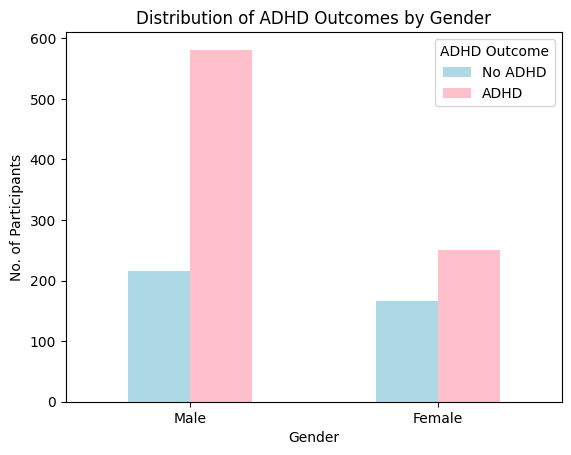

In [ ]:
# eda on train data 
print(train_data)
print(train_data.info())
print(train_data.isnull().sum())

# histogram

train_data_grouped = train_data.groupby(['Sex_F', 'ADHD_Outcome']).size().unstack(fill_value=0)

train_data_grouped.plot(kind='bar', stacked=False, color=['lightblue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('No. of Participants')
plt.title('Distribution of ADHD Outcomes by Gender')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.legend(['No ADHD', 'ADHD'], title='ADHD Outcome')


In [ ]:
df_preprocessed = categorical_data.copy()
for column in categorical_data.columns:
    if categorical_data[column].dtype in ['float64', 'int64']:
        if categorical_data[column].isnull().sum() > 0:
            unique_vals = categorical_data[column].dropna().unique()
            if len(unique_vals) < 20:
                df_preprocessed[column].fillna(categorical_data[column].mode()[0], inplace=True)
            else:
                df_preprocessed[column].fillna(categorical_data[column].median(), inplace=True)
df_preprocessed['participant_id'] = categorical_data['participant_id']


C:\Users\Neha\AppData\Local\Temp\ipykernel_28204\3160495689.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_preprocessed[column].fillna(categorical_data[column].mode()[0], inplace=True)


Summary Statistics:

       Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
count              1213.000000             1213.000000   
mean               2017.652102                2.014839   
std                   1.122522                1.135147   
min                2015.000000                1.000000   
25%                2017.000000                1.000000   
50%                2018.000000                1.000000   
75%                2019.000000                3.000000   
max                2020.000000                4.000000   

       PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
count                       1213.000000                  1213.000000   
mean                           0.420445                     2.080791   
std                            0.685525                     3.164636   
min                            0.000000                     0.000000   
25%                            0.000000                     0.000000   
50%                     

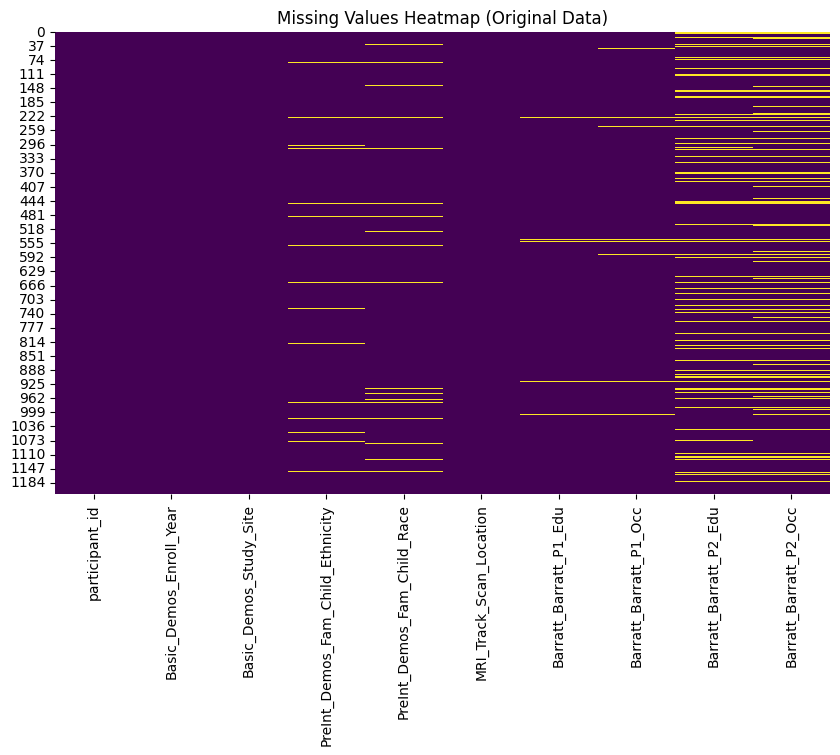

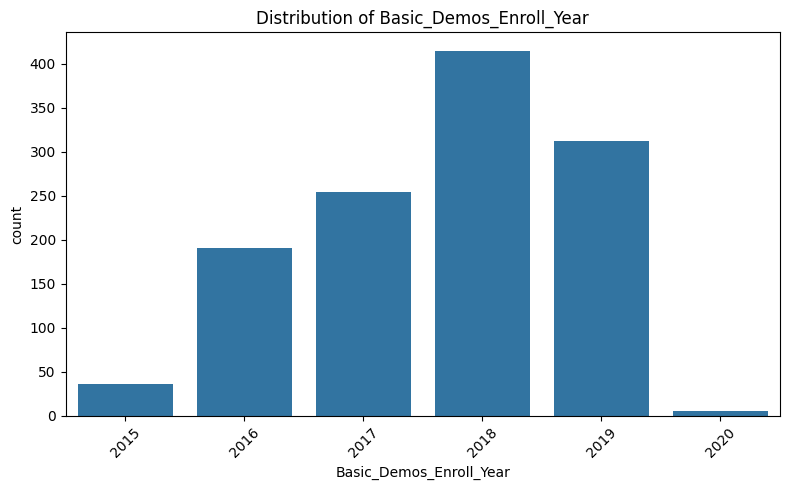

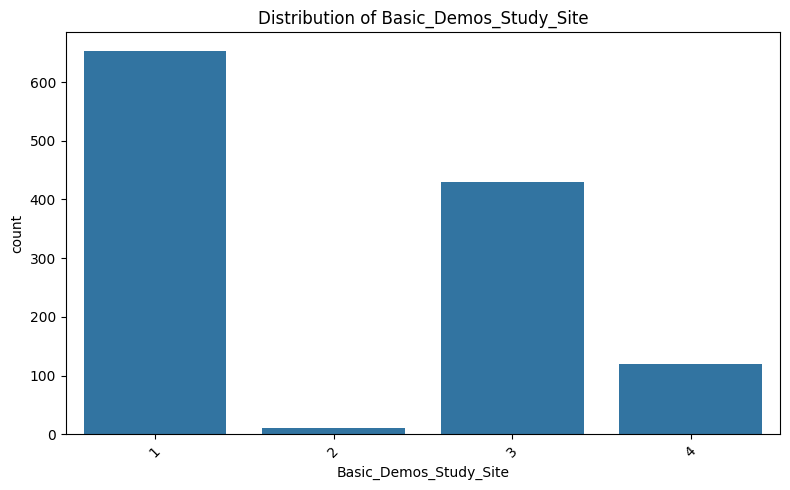

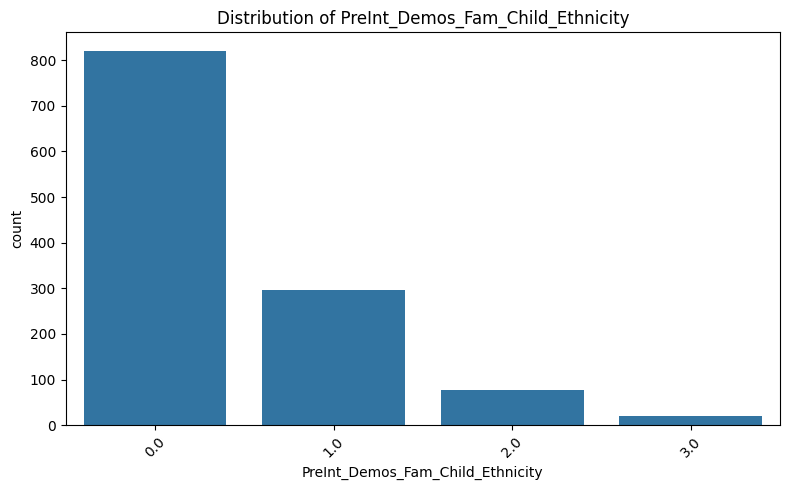

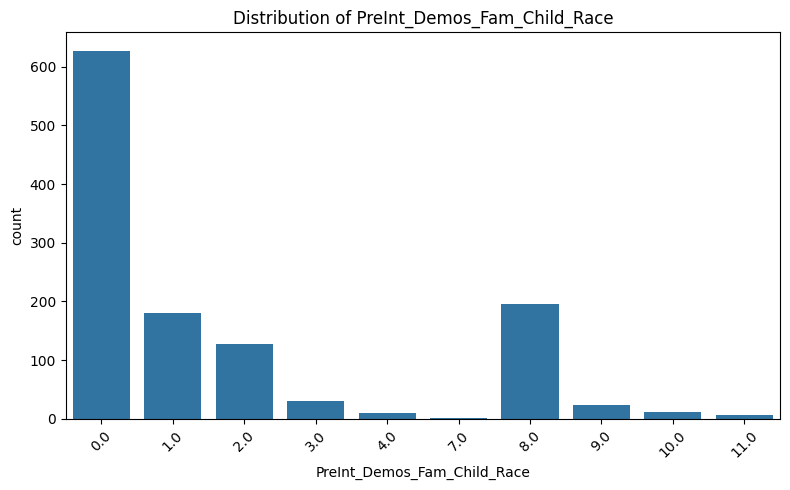

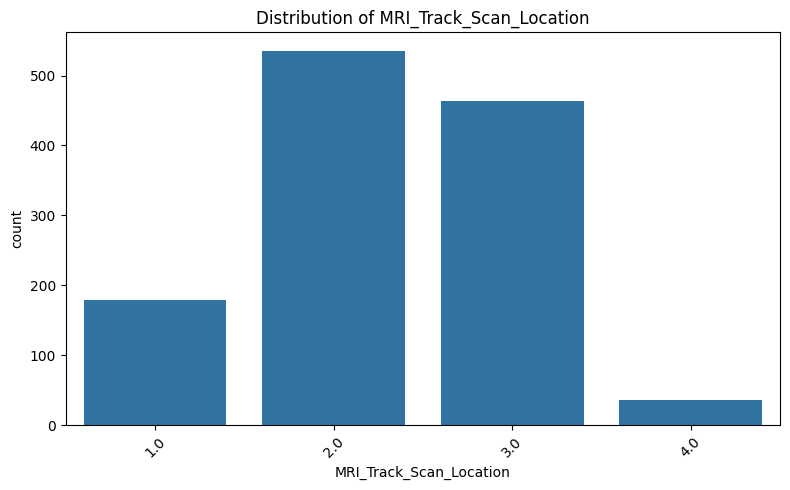

In [ ]:

# 1. Summary Statistics 
print("Summary Statistics:\n") 
print(df_preprocessed.describe())


# Count Plots for Categorical Features
categorical_columns = [
    'Basic_Demos_Enroll_Year',
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location'
]

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df_preprocessed)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

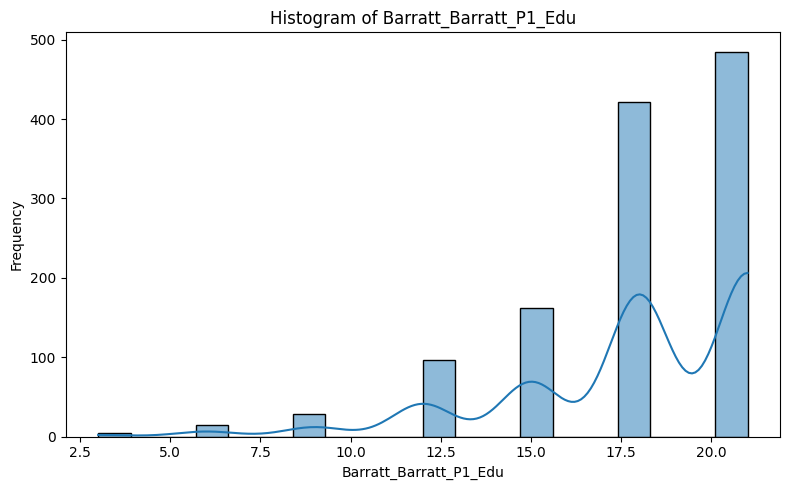

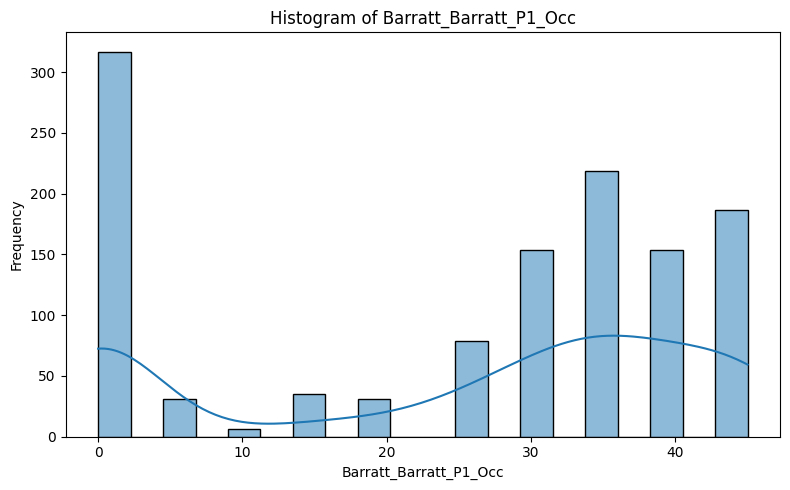

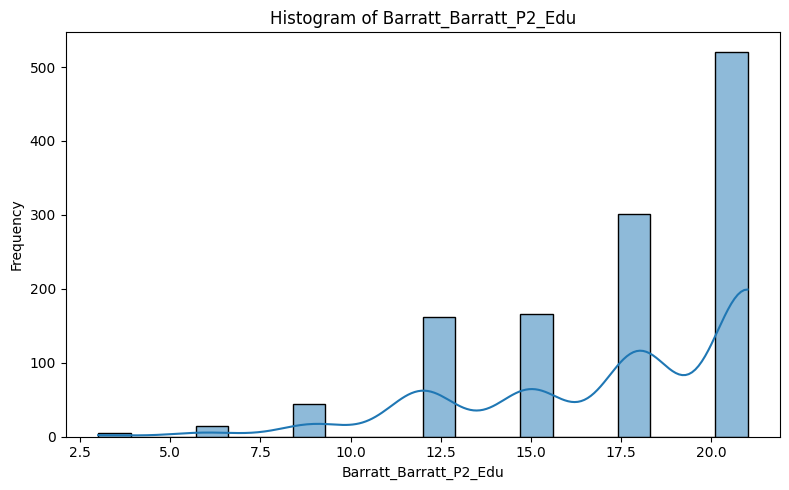

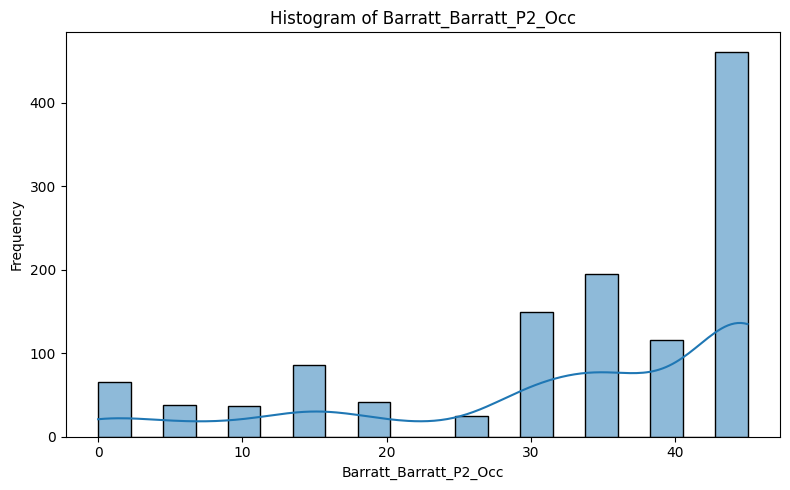

In [36]:
# 4. Histograms for Numerical (Score) Features
numerical_columns = [
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_preprocessed[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

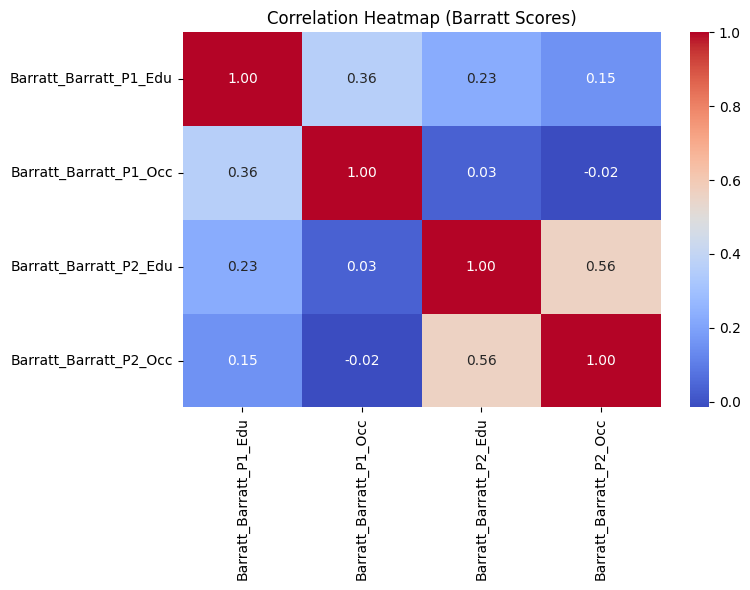

In [37]:
# 5. Correlation Heatmap for Score Features
plt.figure(figsize=(8, 6))
corr = df_preprocessed[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Barratt Scores)")
plt.tight_layout()
plt.show()

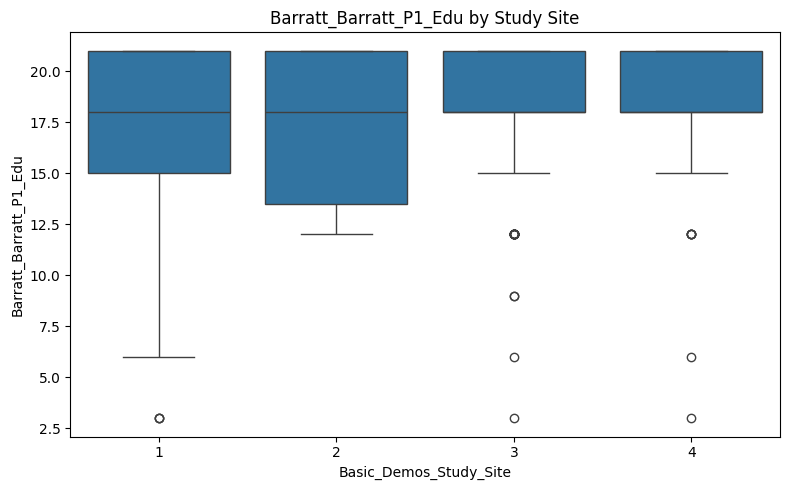

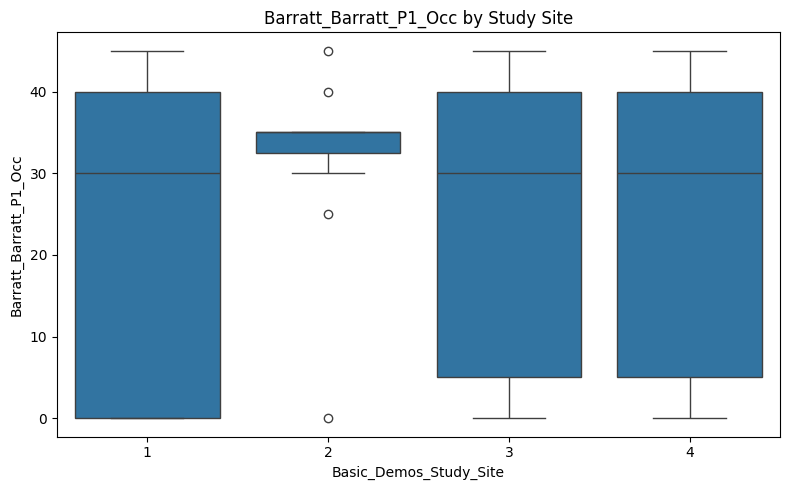

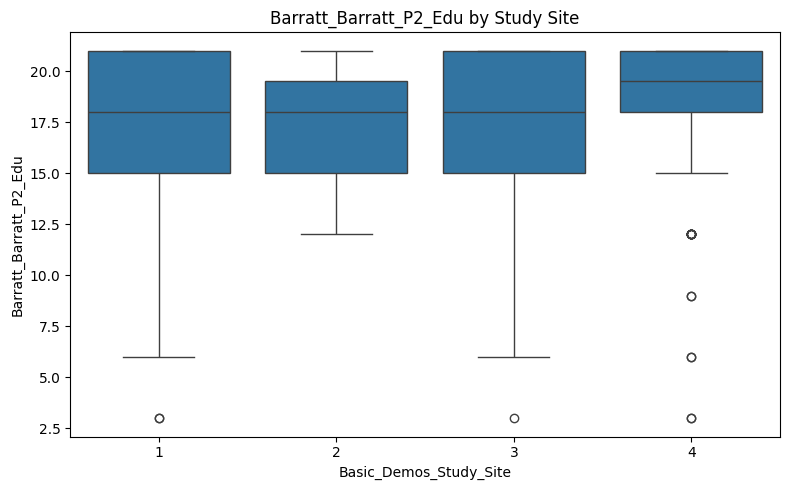

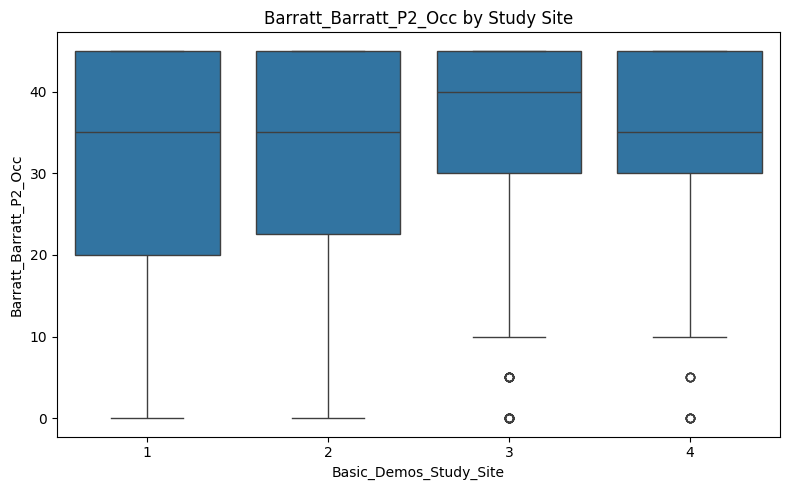

In [38]:
# 6. Boxplots by Study Site for Scores
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Basic_Demos_Study_Site', y=col, data=df_preprocessed)
    plt.title(f"{col} by Study Site")
    plt.tight_layout()
    plt.show()

In [ ]:
df_cleaned = quantitative_data.copy()
df_cleaned = df_cleaned[df_cleaned['participant_id'].notna()]
df_cleaned.columns = [col.lower() for col in df_cleaned.columns]

# Impute numeric columns with median
numeric_cols = df_cleaned.select_dtypes(include='float64').columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())
df_cleaned.reset_index(drop=True, inplace=True)

# Set visual theme
sns.set(style="whitegrid")
# 1. Summary Statistics
summary_stats = df_cleaned.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
        ehq_ehq_total  colorvision_cv_score  apq_p_apq_p_cp  apq_p_apq_p_id  \
count    1213.000000           1213.000000     1213.000000     1213.000000   
mean       59.710717             13.430338        3.811212       13.333883   
std        49.512969              2.094186        1.326229        3.575884   
min      -100.000000              0.000000        2.000000        5.000000   
25%        46.670000             14.000000        3.000000       11.000000   
50%        77.800000             14.000000        3.000000       13.000000   
75%        93.400000             14.000000        4.000000       16.000000   
max       100.000000             14.000000       12.000000       28.000000   

       apq_p_apq_p_inv  apq_p_apq_p_opd  apq_p_apq_p_pm  apq_p_apq_p_pp  \
count      1213.000000      1213.000000     1213.000000      1213.00000   
mean         39.769992        17.963726       16.551525        25.50371   
std           4.848601         3.317421        5.12

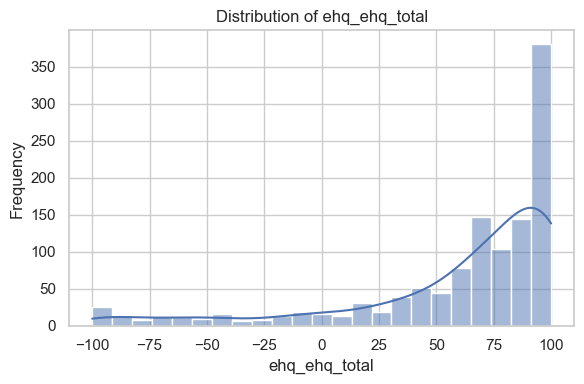

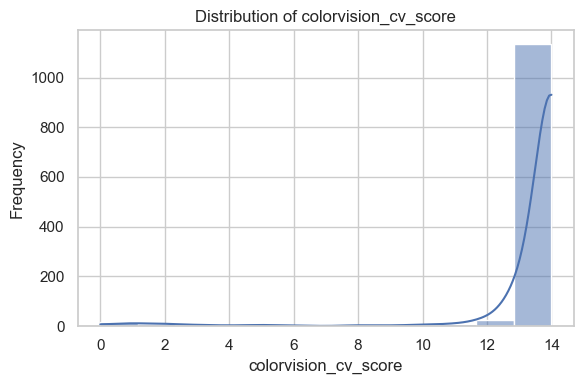

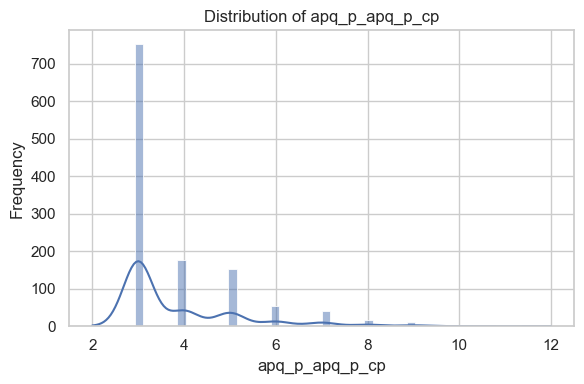

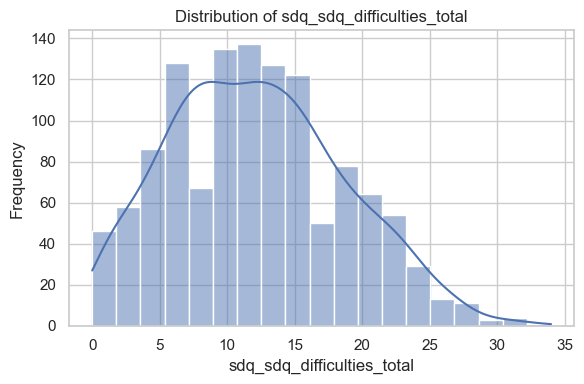

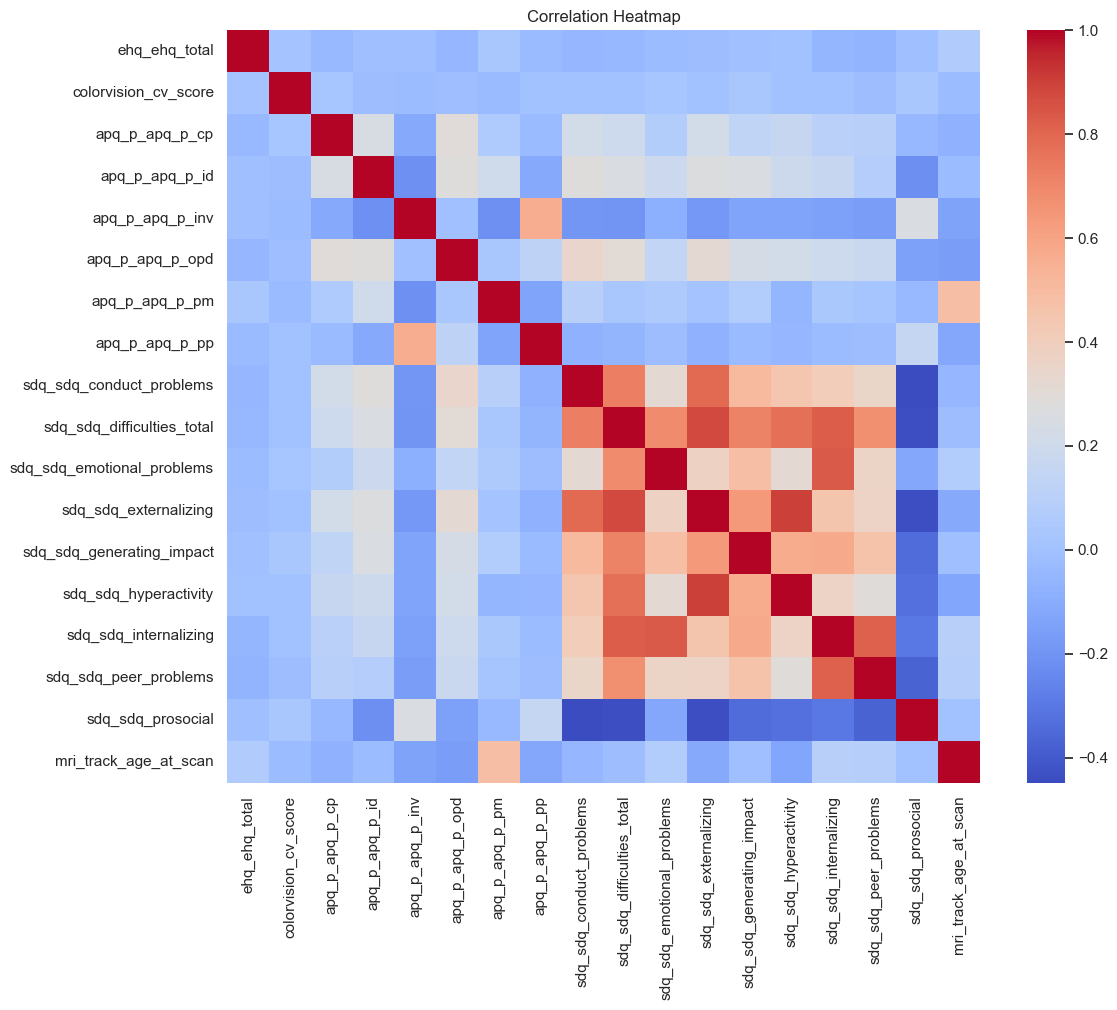

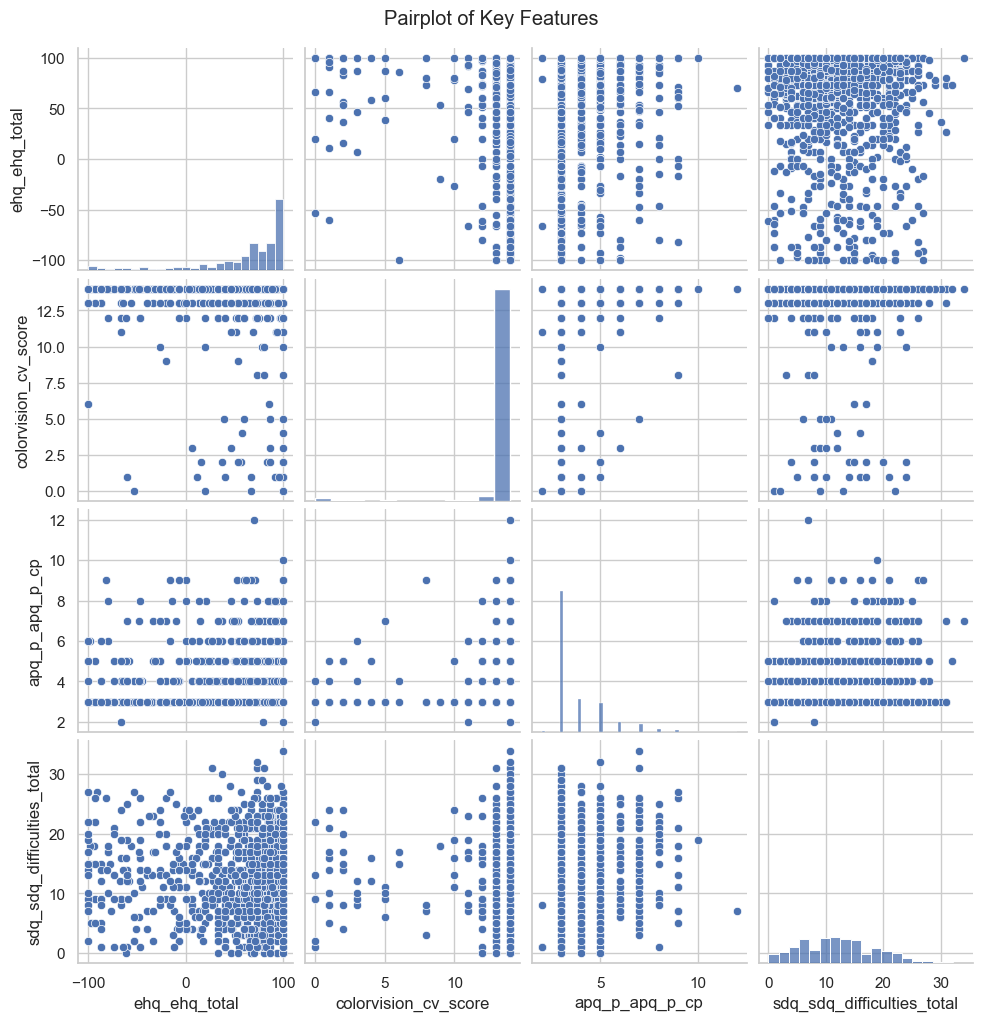

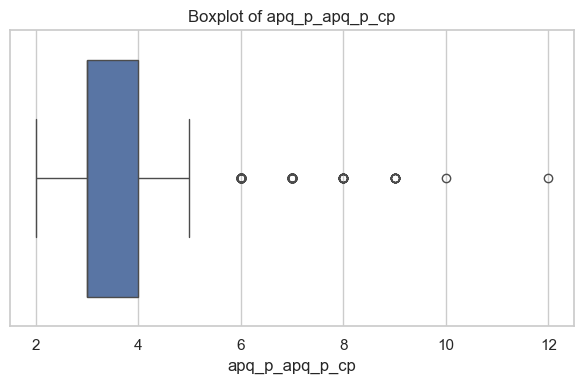

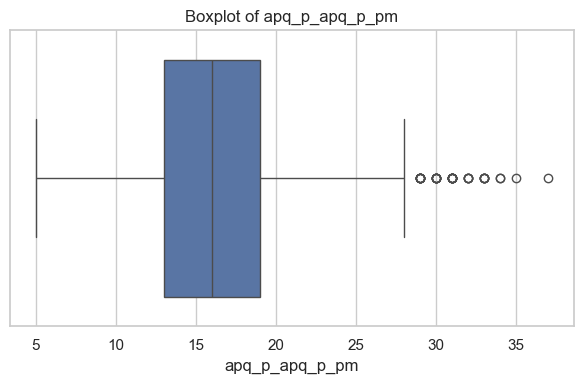

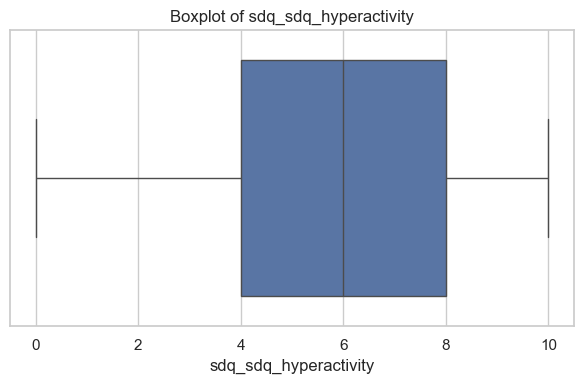

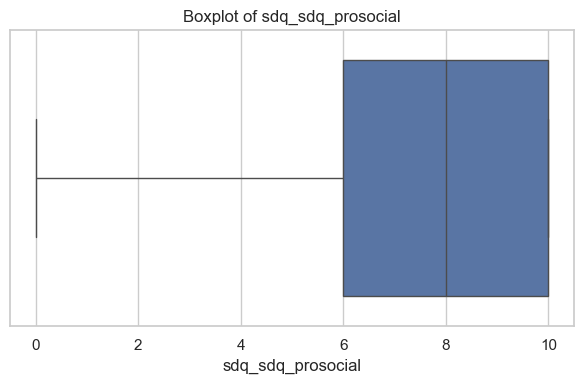

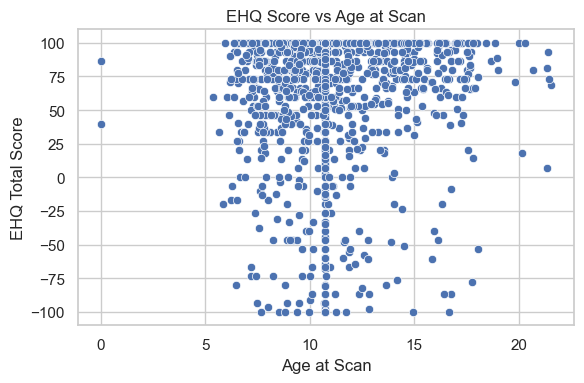

In [ ]:

# 2. Correlation Matrix
correlation_matrix = df_cleaned[numeric_cols].corr()

# 3. Distribution Plots
key_metrics = ['ehq_ehq_total', 'colorvision_cv_score', 'apq_p_apq_p_cp', 'sdq_sdq_difficulties_total']
for col in key_metrics:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 5. Pairplot of Key Features
sns.pairplot(df_cleaned[key_metrics])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# 6. Boxplots for Outlier Detection
boxplot_cols = ['apq_p_apq_p_cp', 'apq_p_apq_p_pm', 'sdq_sdq_hyperactivity', 'sdq_sdq_prosocial']
for col in boxplot_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# 7. Age-based Trend Analysis
if 'mri_track_age_at_scan' in df_cleaned.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_cleaned, x='mri_track_age_at_scan', y='ehq_ehq_total')
    plt.title('EHQ Score vs Age at Scan')
    plt.xlabel('Age at Scan')
    plt.ylabel('EHQ Total Score')
    plt.tight_layout()
    plt.show()  